# <center> PHYS-301: Complex Dynamics & Chaos 
## <center> Computational Problem 
---

I am working on map #3, the cusp map

$$\begin{equation} 
x_{n+1} = 1 - r \sqrt{|x_n|} \ \ \quad \ 0 \leq r \leq 1
\end{equation}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

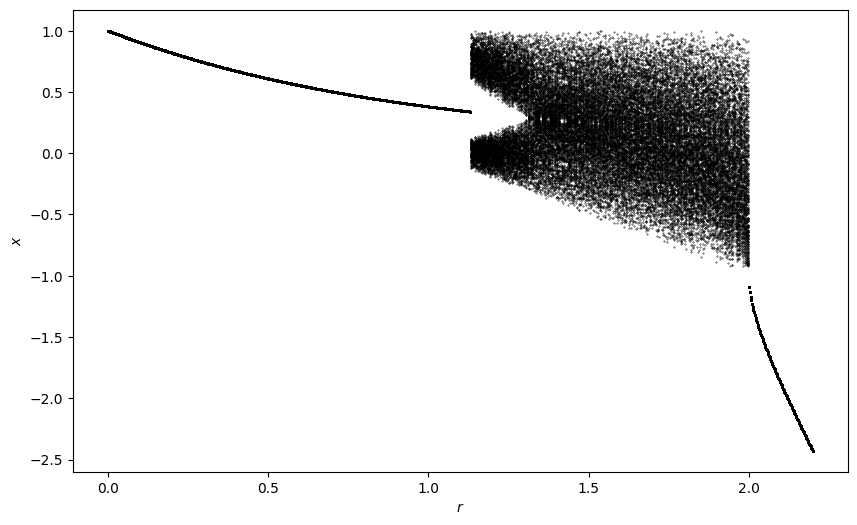

In [61]:
def cusp_map(x, r):
    return 1 - r * np.sqrt((np.abs(x)))

r_values = np.linspace(0, 2.2, 1000) 
iterations = 1000 
last = 100

x_values = []
r_points = []

for r in r_values:
    x = 1
    for i in range(iterations):
        x = cusp_map(x, r)
        if i >= (iterations - last):
            x_values.append(x)
            r_points.append(r)

plt.figure(figsize=(10, 6))
plt.scatter(r_points, x_values, s=0.1, color='black')
#plt.title('Bifurcation diagram of the Cusp Map')
plt.xlabel('$r$')
plt.savefig('full range bifrucation')
plt.ylabel('$x$')
plt.show()

Assignment: 

1. Study the dynamics of the 1D iterative map by generating its stability bifurcation diagram
2. Verify your results by computing the Lyapunov exponent
3. Calculate other complexity quantifiers such as permutation entropy, Fisher information measure, and/or Shannon entropy, as a function of the control parameter
4. Discuss the different dynamical regimes present in the system
5. Present your results in a paper that contains
   (a) Title
   (b) Introdiction where you briefly describle the techniques you use and their implications
   (c) Results where you present your figures and discuss their meaning
   (d) Conclusions where you summarize your results and compare with the logistic map
   

#### Lyapunov Exponent 

$$\lambda = \lim_{n\to\infty} \frac{1}{n} \sum_{i=0}^{n-1}(ln|f'(x)|)$$

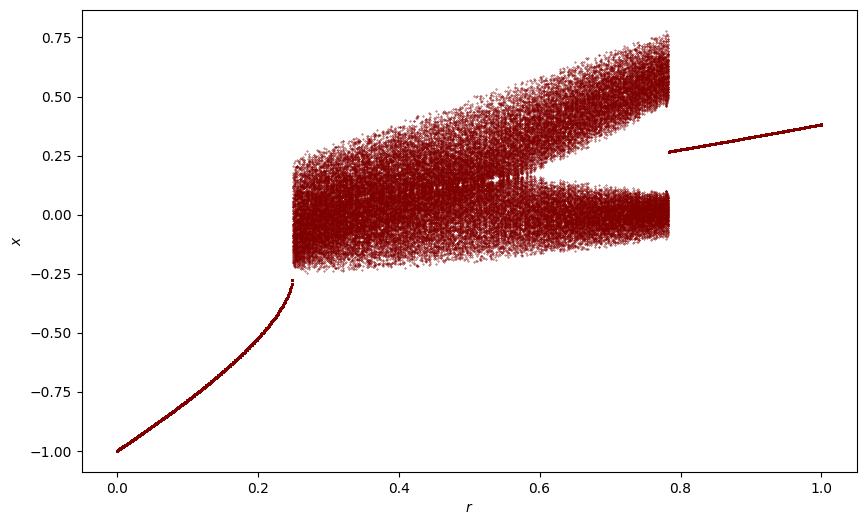

In [101]:
def cusp_map(x, r):
    return r - np.sqrt((np.abs(x)))

r_values = np.linspace(0, 1, 1000) 
iterations = 1000 
last = 100

x_values = []
r_points = []

for r in r_values:
    x = 0.1
    for i in range(iterations):
        x = cusp_map(x, r)
        if i >= (iterations - last):
            x_values.append(x)
            r_points.append(r)

plt.figure(figsize=(10, 6))
plt.scatter(r_points, x_values, s=0.1, color='maroon')
#plt.title('Bifurcation diagram of the Cusp Map')
plt.xlabel('$r$')
plt.ylabel('$x$')
#plt.xlim(1,0)
plt.savefig('knifemap')
plt.show()

In [69]:
### Lyapunov exponent ### 
r = 1.5
x0 = 0.1
n_iter = 100000 

lyapunov_sum = 0
x = x0

for i in range(n_iter):
    derivative = -r / (2 * np.sqrt(np.abs(x)))
    if derivative != 0:
        lyapunov_sum += np.log(np.abs(derivative))
    x = 1 - r * np.sqrt(np.abs(x))

lyapunov_exponent = lyapunov_sum / n_iter
print(lyapunov_exponent)


0.48142898551322605


In [78]:
n_bins = 300

x_values = [x0]
x = x0
for i in range(n_iter - 1):
    x = cusp_map(x, r)
    x_values.append(x)

hist, bin_edges = np.histogram(x_values, bins=n_bins, density=True)

probabilities = hist * np.diff(bin_edges)

shannon_entropy = -np.sum(probabilities * np.log(probabilities, where=(probabilities > 0)))

normalized_shannon_entropy = shannon_entropy / np.log(n_bins)
print(normalized_shannon_entropy)
    

0.9716592480070411


In [83]:
F_0 = 1
FIM = F_0 * np.sum((np.sqrt(probabilities[1:]) - np.sqrt(probabilities[:-1]))**2)
print(FIM)


0.001758415005189612


In [97]:
### KNIFE MAP ### 
def knife_map(x, r):
    return r - np.sqrt((np.abs(x)))
### Lyapunov exponent ### 
r = 1.5
x0 = 0.1
n_iter = 100000 

lyapunov_sum = 0
x = x0

for i in range(n_iter):
    derivative = 1 / (2 * np.sqrt(np.abs(x)))
    if derivative != 0:
        lyapunov_sum += np.log(np.abs(derivative))
    x = 1 - r * np.sqrt(np.abs(x))

lyapunov_exponent = lyapunov_sum / n_iter
print(lyapunov_exponent)


n_bins = int(np.sqrt(n_iter))

x_values = [x0]
x = x0
for i in range(n_iter - 1):
    x = knife_map(x, r)
    x_values.append(x)

hist, bin_edges = np.histogram(x_values, bins=n_bins, density=True)

probabilities = hist * np.diff(bin_edges)

shannon_entropy = -np.sum(probabilities * np.log(probabilities, where=(probabilities > 0)))

normalized_shannon_entropy = shannon_entropy / np.log(n_bins)
print(normalized_shannon_entropy)

F_0 = 1
FIM = F_0 * np.sum((np.sqrt(probabilities[1:]) - np.sqrt(probabilities[:-1]))**2)
print(FIM)

0.07596387740505867
0.0002826172194161176
1.9872917115782414
0.9999999999999999
